In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
redWine = pd.read_csv("winequality-white.csv", delimiter=";") 
redWine.columns = redWine.columns.str.replace(" ","_")
redWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [14]:
whiteWine = pd.read_csv("winequality-white.csv", delimiter=";")
whiteWine.columns = whiteWine.columns.str.replace(" ","_")
whiteWine.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [15]:

whiteWine.info()
whiteWine.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

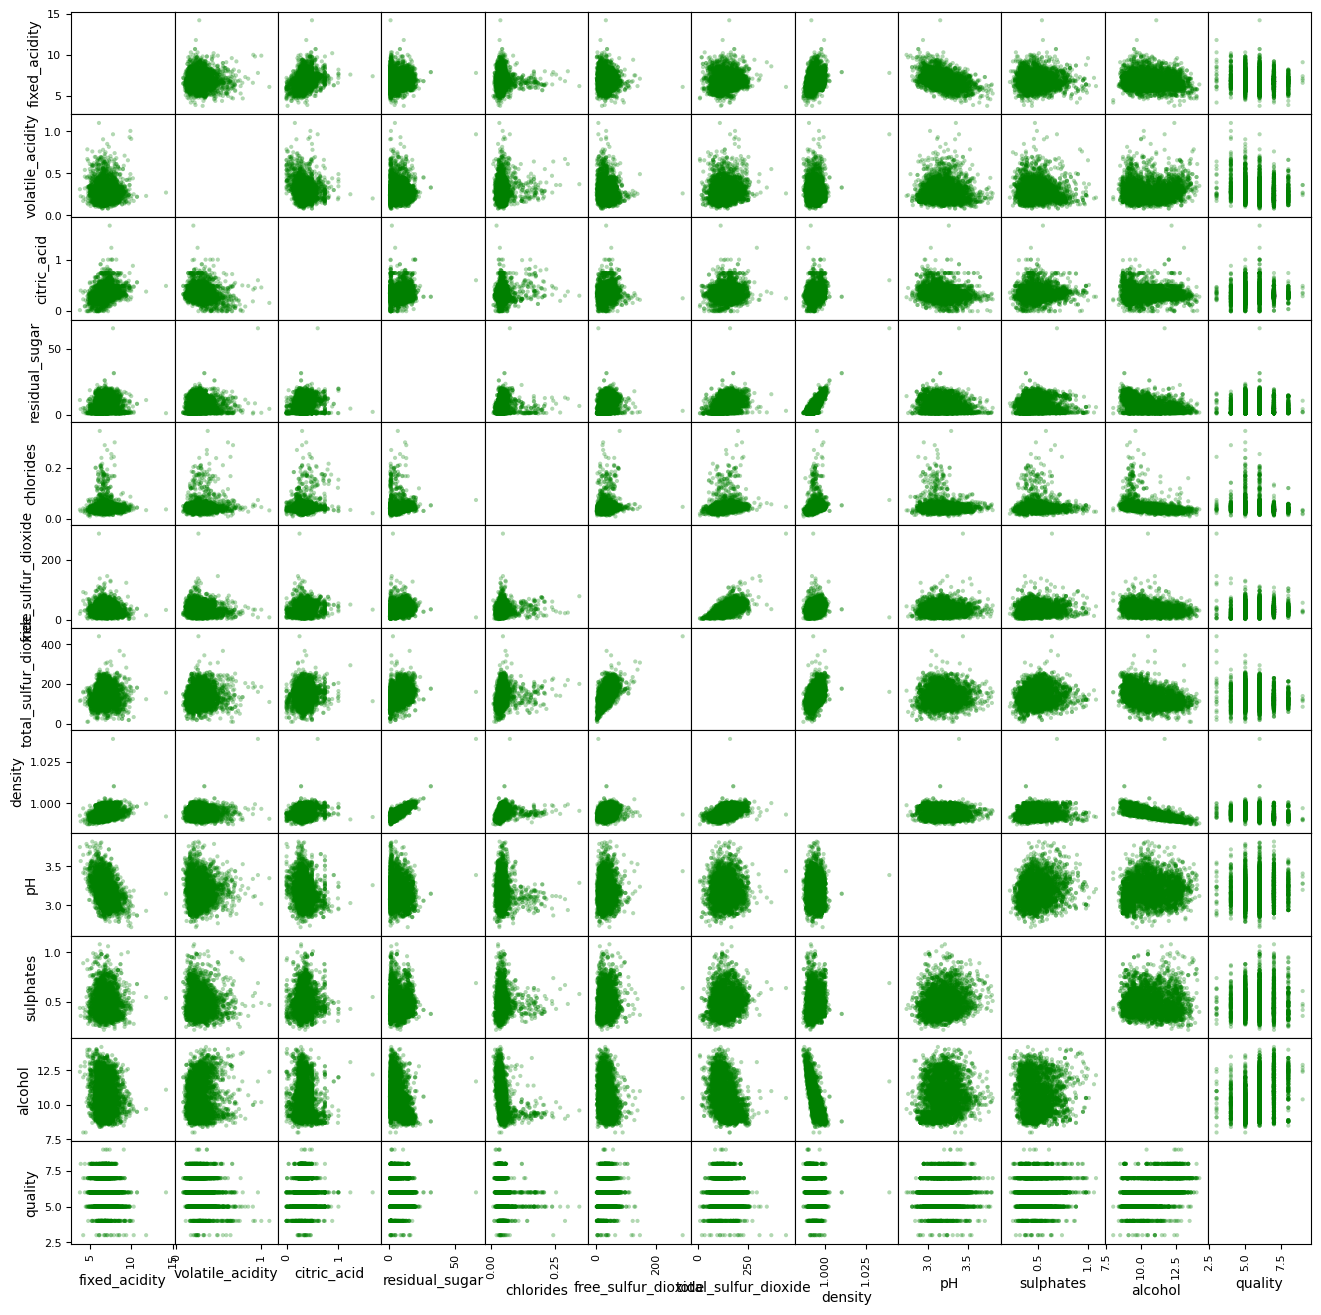

In [16]:
fig2 = pd.plotting.scatter_matrix(whiteWine, figsize=(
    16, 16), diagonal='', alpha=0.3, range_padding=0.2, color='green')


In [17]:
whiteWine.columns


Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

[1,2,3,4,5]: Level 0 (Bad);
[6]: Level 1 (Normal);
[7,8,9]: Level 2 (Good);

In [18]:
xWhite = whiteWine.iloc[:, :-2]
qualityLevel = []
for q in redWine['quality']:
    if q<=5:
        qualityLevel.append(0)
    elif q==6:
        qualityLevel.append(1)
    elif q<=10:
        qualityLevel.append(2)
whiteWine['qualityLevel']=qualityLevel
yWhite = whiteWine['qualityLevel']
xWhite.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40


In [19]:
from collections import Counter
Counter(yWhite)


Counter({1: 2198, 0: 1640, 2: 1060})

In [20]:
import sklearn

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xWhite = sc.fit_transform(xWhite)

In [22]:
xWhite

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
         2.33151201e+00, -1.24692128e+00, -3.49184257e-01],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
        -9.15417164e-03,  7.40028640e-01,  1.34184656e-03],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         3.58664800e-01,  4.75101984e-01, -4.36815783e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -4.97350262e-01, -1.31315295e+00, -2.61552731e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
        -1.78471666e+00,  1.00495530e+00, -9.62604939e-01],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
        -1.54396243e+00,  4.75101984e-01, -1.48839409e+00]])

In [23]:
from sklearn.model_selection import train_test_split
xWhiteTrain, xWhiteTest, yWhiteTrain, yWhiteTest = train_test_split(xWhite, yWhite, test_size = 0.3)


A4.1-DecisionTreeClassifier

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

dtWhite = DecisionTreeClassifier(class_weight='balanced',max_depth=15)
dtWhite.fit(xWhiteTrain, yWhiteTrain)
dtWhitePredict = dtWhite.predict(xWhiteTest)

dtWhiteConfMatrix = confusion_matrix(yWhiteTest, dtWhitePredict)
dtWhiteAccScore = accuracy_score(yWhiteTest, dtWhitePredict)
print(dtWhiteConfMatrix)
print(dtWhiteAccScore)


[[328 110  43]
 [142 408 114]
 [ 31  91 203]]
0.6387755102040816


A4.2-Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegressionCV

lrWhite = LogisticRegressionCV(Cs=5,penalty='l2',
                             class_weight='balanced', multi_class='multinomial')
lrWhite.fit(xWhiteTrain, yWhiteTrain)
lrWhitePredict = lrWhite.predict(xWhiteTest)

lrWhiteConfMatrix = confusion_matrix(yWhiteTest, lrWhitePredict)
lrWhiteAccScore = accuracy_score(yWhiteTest, lrWhitePredict)
print(lrWhiteConfMatrix)
print(lrWhiteAccScore)


[[322 113  46]
 [213 235 216]
 [ 30  85 210]]
0.5217687074829932


A4.3-RandomForestClassifier

In [26]:
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
RFWhite = RandomForestClassifier(
    class_weight='balanced', criterion='entropy')
RFWhite.fit(xWhiteTrain, yWhiteTrain)
RFWhitePredict = RFWhite.predict(xWhiteTest)

RFWhiteConfMatrix = confusion_matrix(yWhiteTest, RFWhitePredict)
RFWhiteAccScore = accuracy_score(yWhiteTest, RFWhitePredict)
print(RFWhiteConfMatrix)
print(RFWhiteAccScore)


[[332 142   7]
 [101 504  59]
 [ 15 124 186]]
0.6952380952380952


A4.4-SVM

In [60]:
from sklearn.svm import SVC
SVMWhite = SVC(C=1.2, gamma=5, class_weight='balanced')
SVMWhite.fit(xWhiteTrain, yWhiteTrain)
SVMWhitePredict = SVMWhite.predict(xWhiteTest)

SVMWhiteConfMatrix = confusion_matrix(yWhiteTest, SVMWhitePredict)
SVMWhiteAccScore = accuracy_score(yWhiteTest, SVMWhitePredict)
print(SVMWhiteConfMatrix)
print(SVMWhiteAccScore)


[[179 302   0]
 [ 23 639   2]
 [  0 210 115]]
0.6346938775510204


A4.5-ExtraTreesClassifier

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
ETWhite = ExtraTreesClassifier(
    class_weight='balanced', criterion='entropy')
ETWhite.fit(xWhiteTrain, yWhiteTrain)
ETWhitePredict = ETWhite.predict(xWhiteTest)

ETWhiteConfMatrix = confusion_matrix(yWhiteTest, ETWhitePredict)
ETWhiteAccScore = accuracy_score(yWhiteTest, ETWhitePredict)
print(ETWhiteConfMatrix)
print(ETWhiteAccScore)


[[335 143   3]
 [ 86 529  49]
 [ 13 132 180]]
0.710204081632653


A4.6-ML

In [35]:
from sklearn.neural_network import MLPClassifier
MLWhite = MLPClassifier(hidden_layer_sizes=(10,))
MLWhite.fit(xWhiteTrain, yWhiteTrain)
MLWhitePredict = MLWhite.predict(xWhiteTest)

MLWhiteConfMatrix = confusion_matrix(yWhiteTest, MLWhitePredict)
MLWhiteAccScore = accuracy_score(yWhiteTest, MLWhitePredict)
print(MLWhiteConfMatrix)
print(MLWhiteAccScore)


[[274 196  11]
 [136 445  83]
 [ 12 155 158]]
0.5965986394557823


c:\Users\n0t1u\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
whiteWine['qualityLevel'].value_counts(normalize=True)


1    0.448755
0    0.334831
2    0.216415
Name: qualityLevel, dtype: float64

Text(0.5, 1.0, 'Models and accuracies in predicting white wine quality')

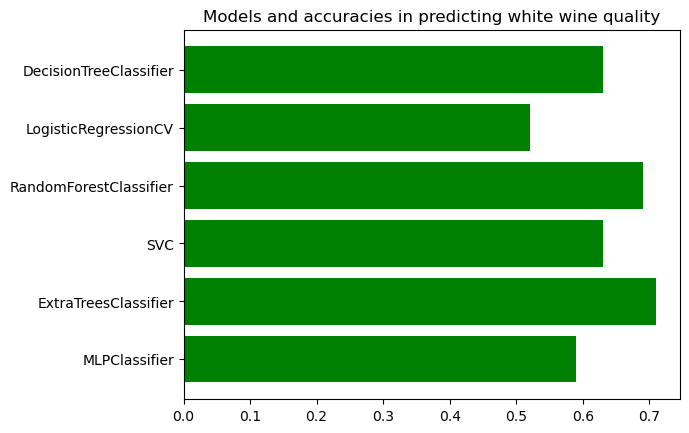

In [63]:
scores = [0.59, 0.71, 0.63, 0.69, 0.52, 0.63]
models = ['MLPClassifier', 'ExtraTreesClassifier',
          'SVC', 'RandomForestClassifier', 'LogisticRegressionCV', 'DecisionTreeClassifier']
plt.barh(models, scores, color='green')
plt.title('Models and accuracies in predicting white wine quality')
